# Logistic Regression

<ul>
    <li>Data Prepration</li> 
    <li>Visualization </li>
    <li>Create train & test set</li> 
    <li>Create a Logistic Regression Model</li>
    <li>Predictions</li>
    <li>Decision Boundary</li> 
    <li>How to use sk-learn</li>
</ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.2,0.1],[0.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500) #generating 500 points and mean and covariance of all these poinst would be as we have defined
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape,dist_02.shape)

(500, 2) (500, 2)


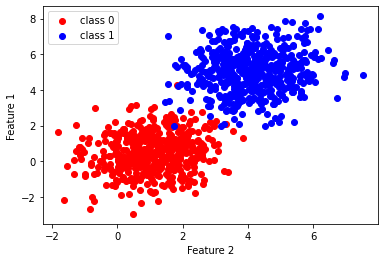

In [3]:
plt.scatter(dist_01[:,0],dist_01[:,1],color="red",label="class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color="blue",label="class 1")
plt.legend()
plt.ylabel("Feature 1")
plt.xlabel("Feature 2")
plt.show()

In [4]:
data = np.zeros((1000,3))
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1

In [5]:
data[:5,:] # two columns of values of features and last column for label

array([[3.32666117, 2.09395849, 0.        ],
       [0.7589742 , 2.31687537, 0.        ],
       [0.96032544, 1.92857462, 0.        ],
       [1.33252075, 0.60854048, 0.        ],
       [2.14283077, 0.91328611, 0.        ]])

In [6]:
np.random.shuffle(data) #shuffling the data for better splitting of data

#Split data into test and training data

split = int(0.8*data.shape[0])
X_train = data[:split,:2]
X_test = data[split:,:2]

Y_train = data[:split,-1]
Y_test = data[split:,-1]

print(X_test.shape,X_train.shape,Y_test.shape,Y_train.shape)

(200, 2) (800, 2) (200,) (800,)


In [7]:
#Normalising the data 
x_mean = X_train.mean(axis=0) #taking mean and standard deviation of both the features, means on axis 0
x_std = X_train.std(axis=0)
print(x_mean,x_std)

[2.58390836 2.80159256] [1.80777726 2.57993575]


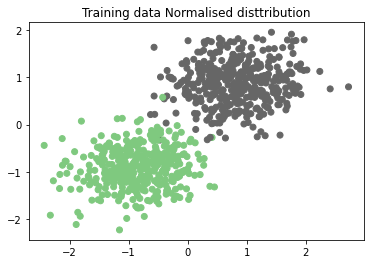

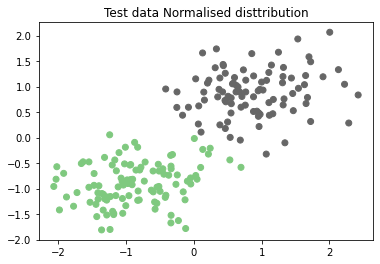

In [8]:
X = (X_train - x_mean)/x_std
plt.title("Training data Normalised disttribution")
plt.scatter(X[:,0],X[:,1],c=Y_train,cmap=plt.cm.Accent)
plt.show()
#Normalising the test data using the same mean of training data so to not cause change in relative distribution
Xtest = (X_test - x_mean)/x_std
plt.title("Test data Normalised disttribution")
plt.scatter(Xtest[:,0],Xtest[:,1],c=Y_test,cmap=plt.cm.Accent)
plt.show()

In [9]:
def sigmoid(x):
    return (1.0/(1.0 + np.exp(-x)))

def hypothesis(X,theta):
    """
    X = (m,n+1)
    theta = (n+1,1)
     == (m,1)
    """
    return sigmoid(np.dot(X,theta))

def error(X,Y,theta):
    """
    X = (m,n+1)
    Y = (m,1)
    theta = (n+1,1)
    
    return scale_value = loss
    """
    hi = hypothesis(X,theta)
    e = -1*np.mean((Y*np.log(hi)) + ((1-Y)*np.log(1-hi)))
    return e


In [10]:
def gradient(X,Y,theta):
    hi = hypothesis(X,theta)
    grad = np.dot(X.T,(Y - hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,Y,lr=0.1,max_epochs=200):
    error_list = []
    n = X.shape[1]
    theta = np.zeros((n,1))
    for i in range(max_epochs):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta = theta + lr*grad
        
    return error_list,theta

In [11]:
# adding the dummy ones in X for theta0
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
Y = Y_train.reshape((-1,1))

In [12]:
print(X.shape,Y.shape)

(800, 3) (800, 1)


In [13]:
error_list,theta = gradient_descent(X,Y)

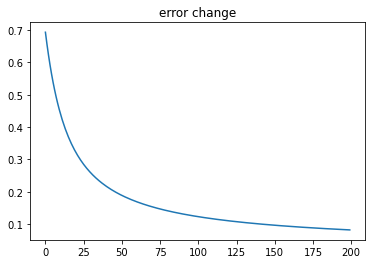

In [14]:
plt.title("error change")
plt.plot(error_list)
plt.show()

In [15]:
print(theta)

[[0.08659939]
 [1.73085013]
 [2.03438532]]


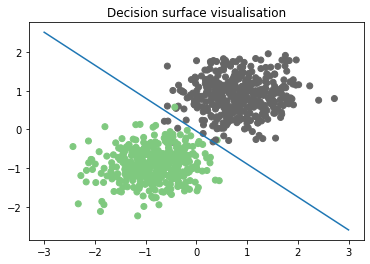

In [22]:
# represet x2 in x1
# theta0 + x1*theta1 + x2*theta2 = 0
#x2 = -(theta0 + x1*theta1)/theta2

#lets take X1 in range -3 to 4
X1 = np.arange(-3,4)
X2 = -1*(theta[0] + X1*theta[1])/theta[2]
plt.title("Decision surface visualisation")
plt.plot(X1,X2)
plt.scatter(X[:,1],X[:,2],c=Y_train,cmap=plt.cm.Accent)
plt.show()


In [29]:
#Prediction and Accuracy
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

Ypred = predict(X,theta)

In [36]:
#accuracy
def accuracy(Y,Ypred):
    Y.reshape((-1,1))
    acc = np.sum(Ypred == Y)/Y.shape[0]
    return acc*100

A = accuracy(Y,Ypred)
print("model is " + str(A) + " % accurate")

model is 99.25 % accurate


## Using Sk-learn for Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [40]:
model.fit(X,Y_train)

LogisticRegression()

In [41]:
theta0 = model.intercept_
theta_s = model.coef_

print(theta0 , theta_s)

[0.40167381] [[9.92634461e-06 3.06180042e+00 4.24974284e+00]]


In [44]:
acc = model.score(X,Y_train)
print(acc*100)

99.25
